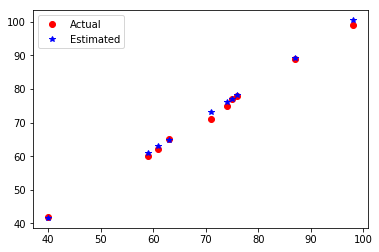

In [1]:
%matplotlib inline

# Using gradient descent for linear regression
# Ideas from https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

# We will attempt to predict the college admission test score based
# on the high school math score (following on Chapter 3 of "Doing Math with Python")

# Known data
x_data = [83, 85, 84, 96, 94, 86, 87, 97, 97, 85]
y_data = [85, 87, 86, 97, 96, 88, 89, 98, 98, 87]

from sympy import Symbol, Derivative
import matplotlib.pyplot as plt

# Assumed linear model
# x = math score in high school
# y = admission test score

# y = m*x + c
def estimate_y(x, m, c):
    y_estimated = m*x + c
    return y_estimated

def estimate_theta(m_current, c_current, max_iterations=50000):
    learning_rate = 0.0001
    m_gradient = 0
    c_gradient = 0
    N = len(x_data)
    
    m = Symbol('m')
    c = Symbol('c')
    y = Symbol('y')
    x = Symbol('x')
    # Error term
    error_term = (y - (m*x+c))**2
    # Error function = 1/n*sum(error_term)
    for i in range(max_iterations):
        for i in range(0, N):
            m_gradient += (1/N)*Derivative(error_term, m).doit().subs({x:x_data[i], y:y_data[i], m:m_current, c:c_current})
            c_gradient += (1/N)*Derivative(error_term, c).doit().subs({x:x_data[i], y:y_data[i], m:m_current, c:c_current})

        m_new = m_current - (learning_rate * m_gradient)
        c_new = c_current - (learning_rate * c_gradient)
        if abs(m_new - m_current) < 1e-5 or abs(c_new - c_current) < 1e-5:
            break
        else:
            m_current = m_new
            c_curret = c_new
    return m_new, c_new
        
m, c = estimate_theta(1, 1)

# Let's try and unknown set of data 
# This data set is different and widely spread, 
# but they are very similarly correlated
x_data = [63, 61, 98, 76, 74, 59, 40, 87, 71, 75]
y_data = [65, 62, 99, 78, 75, 60, 42, 89, 71, 77]

y_estimated = [estimate_y(x, m, c) for x in x_data]
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_estimated, 'b*')
plt.legend(['Actual', 'Estimated'], loc='best')
plt.show()
